In [91]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.ticker import FuncFormatter

# Set the style
#sns.set_palette('pastel')
Cambridge_dark = sns.color_palette(['#D6083B', '#0072CF', '#EA7125', '#55A51C', '#8F2BBC', '#00B1C1', '#901C3B', '#003E74', '#CB4F00', '#445026', '#422E5D', '#106470'  ])
Cambridge_light = sns.color_palette(['#D6083B','#EB99A9','#0072CF','#68ACE5','#EA7125','#F3BD48','#55A51C','#AAB300','#8F2BBC','#AF95A3','#00B1C1','#91B9A4' ])
Spring_Pastels=sns.color_palette(["#fd7f6f", "#7eb0d5", "#b2e061", "#bd7ebe", "#ffb55a", "#ffee65", "#beb9db", "#fdcce5", "#8bd3c7"])
Spring_Pastels_01=sns.color_palette(["#3b5998","#00aced","#007bb6","#517fa4","#dd4b39","#bb0000","#cb2027","#ff0084","#32506d","#0072b1","#ea4c89","#00bf8f","#1769ff","#171516","#00aff0","#fffa37","#64d448"])
Custom_Color_Palette = sns.color_palette(["#ebac23","#b80058","#008cf9","#00bbad","#d163e6","#b24502","#ff9287","#5954d6","#00c6f8","#878500","#00a76c","#bdbdbd"])

Use_Color_Palette = Cambridge_dark
specical_color = 'tab20'
Accent = 'Accent'
Set1 = 'Set1'
Pastel1 = 'Pastel1'
Paired = 'Paired'
sns.set_palette(specical_color)

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
file_path = '../export/BTSelResults/'

In [93]:
Scenario_A_data_file = file_path + 'Scenario_A_BAU.csv'
Scenario_B_data_file = file_path + 'Scenario_B_PC.csv'
Scenario_C_data_file = file_path + 'Scenario_C_PC_Storage.csv'

In [94]:
def read_data(file_path):
    data = pd.read_csv(file_path, index_col=0, header=None)
    data = data.iloc[:, 1:]
    return data

Scenario_A_data = read_data(Scenario_A_data_file)
Scenario_B_data = read_data(Scenario_B_data_file)
Scenario_C_data = read_data(Scenario_C_data_file)

# Energy Supply Transformation

In [95]:
def get_energy_supply_capacity(BAU_data):
    total_annual_capacity = BAU_data.loc['TotalAnnualCapacity']
    row_to_select = [i for i in range(9) if i != 4 and i != 3]
    energy_supply_capacity = total_annual_capacity.iloc[row_to_select,1:32]
    year_list = list(range(2020, 2051))
    energy_supply_capacity.columns = year_list
    energy_supply_list = [
    'OilCT',
    'NGCC',	
    'Wind',	
    #'genPumpStr',
    'Coal',	
    'Nuclear',
    'Hydro',
    'UnMet'
    ]
    energy_supply_capacity.index = energy_supply_list
    energy_supply_capacity = energy_supply_capacity.apply(pd.to_numeric, errors='coerce')
    energy_supply_capacity = energy_supply_capacity.T
    return energy_supply_capacity

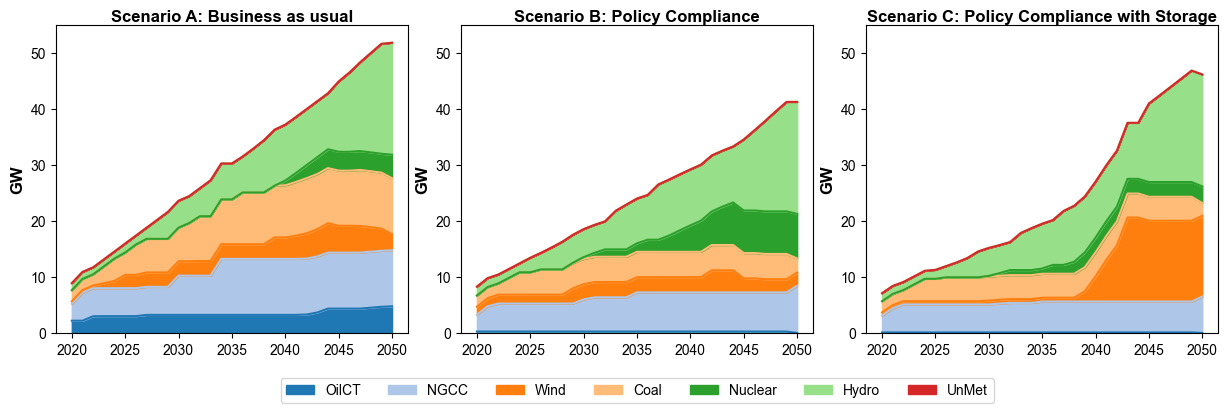

In [96]:
plt.rcParams.update({'font.family': 'Arial'})
fig = plt.figure(figsize=(15,4))  # You can adjust the size to fit your requirements
gs = gridspec.GridSpec(1, 3, width_ratios=[1, 1, 1], wspace=0.15)
axes = [plt.subplot(gs[i, j]) for i in range(1) for j in range(3)]

# Add the row titles to the left side of the plot
axes[0].set_title('Scenario A: Business as usual', verticalalignment='center', fontsize=12,fontweight='bold')
axes[1].set_title('Scenario B: Policy Compliance', verticalalignment='center', fontsize=12,fontweight='bold')
axes[2].set_title('Scenario C: Policy Compliance with Storage', verticalalignment='center', fontsize=12,fontweight='bold')


Scenario_A_capacity = get_energy_supply_capacity(Scenario_A_data)
Scenario_B_capacity = get_energy_supply_capacity(Scenario_B_data)
Scenario_C_capacity = get_energy_supply_capacity(Scenario_C_data)


# Calculate the maximum y-value across all three DataFrames
max_y = 55

# Create the plots with the same y-axis
Scenario_A_capacity.plot(kind='area', ax=axes[0], legend=False)
axes[0].set_ylim([0, max_y])

Scenario_B_capacity.plot(kind='area', ax=axes[1], legend=False)
axes[1].set_ylim([0, max_y])

Scenario_C_capacity.plot(kind='area', ax=axes[2], legend=False)
axes[2].set_ylim([0, max_y])

# add unit to y-axis
axes[0].set_ylabel('GW', fontsize=12, fontweight='bold')
axes[1].set_ylabel('GW', fontsize=12, fontweight='bold')
axes[2].set_ylabel('GW', fontsize=12, fontweight='bold')

# Add legend
axes[1].legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=len(axes[1].lines))

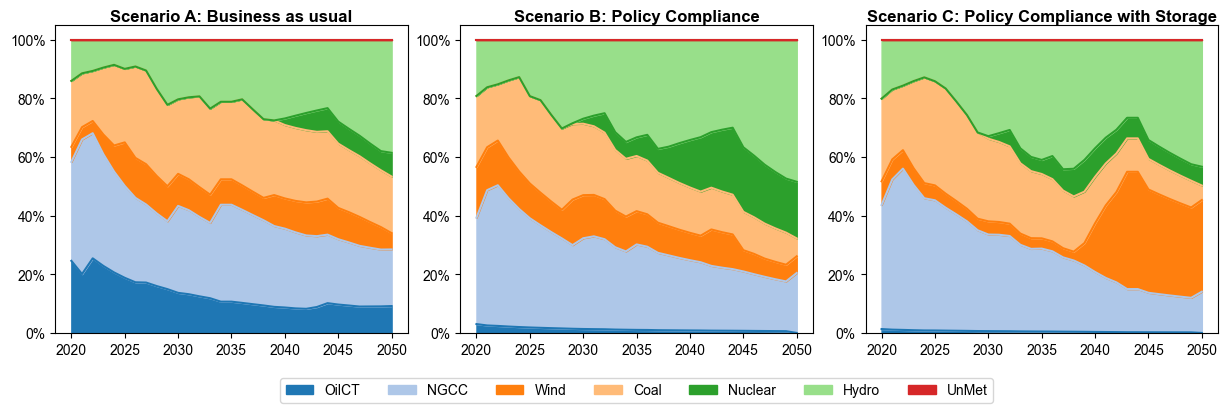

In [97]:
plt.rcParams.update({'font.family': 'Arial'})
fig = plt.figure(figsize=(15,4))  # You can adjust the size to fit your requirements
gs = gridspec.GridSpec(1, 3, width_ratios=[1, 1, 1], wspace=0.15)
axes = [plt.subplot(gs[i, j]) for i in range(1) for j in range(3)]

# Add the row titles to the left side of the plot
axes[0].set_title('Scenario A: Business as usual', verticalalignment='center', fontsize=12,fontweight='bold')
axes[1].set_title('Scenario B: Policy Compliance', verticalalignment='center', fontsize=12,fontweight='bold')
axes[2].set_title('Scenario C: Policy Compliance with Storage', verticalalignment='center', fontsize=12,fontweight='bold')

Scenario_A_capacity_percentage = Scenario_A_capacity.div(Scenario_A_capacity.sum(axis=1), axis=0)
Scenario_B_capacity_percentage = Scenario_B_capacity.div(Scenario_B_capacity.sum(axis=1), axis=0)
Scenario_C_capacity_percentage = Scenario_C_capacity.div(Scenario_C_capacity.sum(axis=1), axis=0)

# Define a function to format the y-axis labels as percentages
def to_percent(y, position):
    return f'{100 * y:.0f}%'

# Create a formatter using this function
formatter = FuncFormatter(to_percent)

# Apply the formatter to the y-axis of each plot
axes[0].yaxis.set_major_formatter(formatter)
axes[1].yaxis.set_major_formatter(formatter)
axes[2].yaxis.set_major_formatter(formatter)


Scenario_A_capacity_percentage.plot(kind='area', ax=axes[0], legend=False)
Scenario_B_capacity_percentage.plot(kind='area', ax=axes[1], legend=False)
Scenario_C_capacity_percentage.plot(kind='area', ax=axes[2], legend=False)

# Add legend
axes[1].legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=len(axes[1].lines))

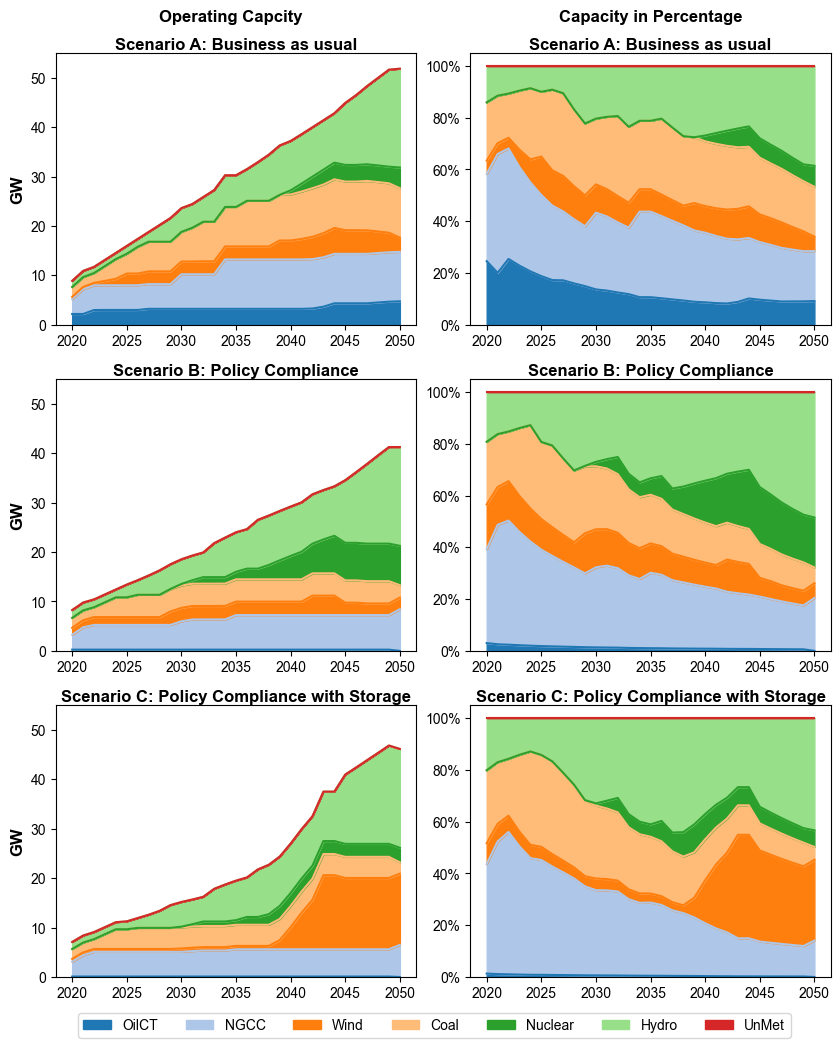

In [98]:
plt.rcParams.update({'font.family': 'Arial'})
fig = plt.figure(figsize=(10,12))  # You can adjust the size to fit your requirements
gs = gridspec.GridSpec(3, 2, width_ratios=[1, 1], wspace=0.15)
axes = [plt.subplot(gs[i, j]) for i in range(3) for j in range(2)]

# Add the column titles above the plot
fig.text(0.3, 0.91, 'Operating Capcity',           verticalalignment='center', fontsize=12, horizontalalignment='center',fontweight='bold')
fig.text(0.72, 0.91, 'Capacity in Percentage',          verticalalignment='center', fontsize=12, horizontalalignment='center',fontweight='bold')

# Add the row titles to the left side of the plot
axes[0].set_title('Scenario A: Business as usual', verticalalignment='center', fontsize=12,fontweight='bold')
axes[2].set_title('Scenario B: Policy Compliance', verticalalignment='center', fontsize=12,fontweight='bold')
axes[4].set_title('Scenario C: Policy Compliance with Storage', verticalalignment='center', fontsize=12,fontweight='bold')


Scenario_A_capacity = get_energy_supply_capacity(Scenario_A_data)
Scenario_B_capacity = get_energy_supply_capacity(Scenario_B_data)
Scenario_C_capacity = get_energy_supply_capacity(Scenario_C_data)


# Calculate the maximum y-value across all three DataFrames
max_y = 55

# Create the plots with the same y-axis
Scenario_A_capacity.plot(kind='area', ax=axes[0], legend=False)
axes[0].set_ylim([0, max_y])

Scenario_B_capacity.plot(kind='area', ax=axes[2], legend=False)
axes[2].set_ylim([0, max_y])

Scenario_C_capacity.plot(kind='area', ax=axes[4], legend=False)
axes[4].set_ylim([0, max_y])

# add unit to y-axis
axes[0].set_ylabel('GW', fontsize=12, fontweight='bold')
axes[2].set_ylabel('GW', fontsize=12, fontweight='bold')
axes[4].set_ylabel('GW', fontsize=12, fontweight='bold')


# Add the row titles to the left side of the plot
axes[1].set_title('Scenario A: Business as usual', verticalalignment='center', fontsize=12,fontweight='bold')
axes[3].set_title('Scenario B: Policy Compliance', verticalalignment='center', fontsize=12,fontweight='bold')
axes[5].set_title('Scenario C: Policy Compliance with Storage', verticalalignment='center', fontsize=12,fontweight='bold')

Scenario_A_capacity_percentage = Scenario_A_capacity.div(Scenario_A_capacity.sum(axis=1), axis=0)
Scenario_B_capacity_percentage = Scenario_B_capacity.div(Scenario_B_capacity.sum(axis=1), axis=0)
Scenario_C_capacity_percentage = Scenario_C_capacity.div(Scenario_C_capacity.sum(axis=1), axis=0)

# Define a function to format the y-axis labels as percentages
def to_percent(y, position):
    return f'{100 * y:.0f}%'

# Create a formatter using this function
formatter = FuncFormatter(to_percent)

# Apply the formatter to the y-axis of each plot
axes[1].yaxis.set_major_formatter(formatter)
axes[3].yaxis.set_major_formatter(formatter)
axes[5].yaxis.set_major_formatter(formatter)


Scenario_A_capacity_percentage.plot(kind='area', ax=axes[1], legend=False)
Scenario_B_capacity_percentage.plot(kind='area', ax=axes[3], legend=False)
Scenario_C_capacity_percentage.plot(kind='area', ax=axes[5], legend=False)

# Add legend
axes[4].legend(loc='lower center', bbox_to_anchor=(1.05, -0.25), ncol=len(axes[1].lines))

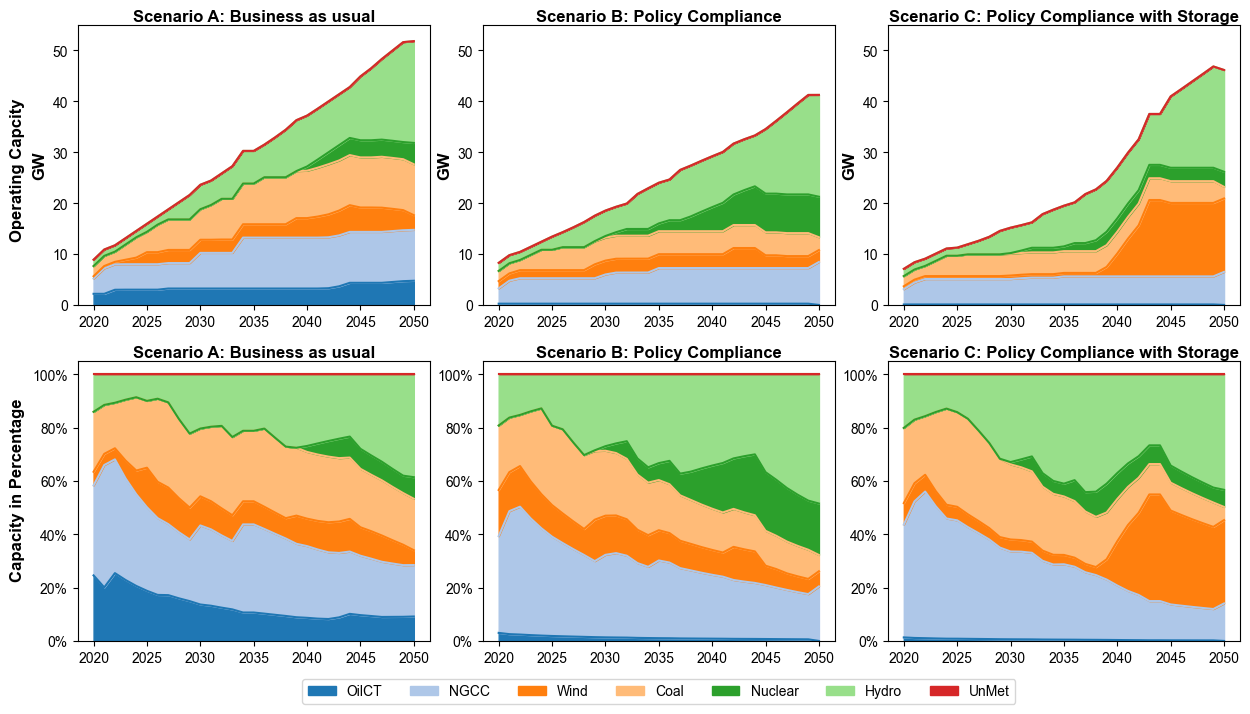

In [120]:
plt.rcParams.update({'font.family': 'Arial'})
fig = plt.figure(figsize=(15,8))  # You can adjust the size to fit your requirements
gs = gridspec.GridSpec(2, 3, width_ratios=[1, 1, 1], wspace=0.15)
axes = [plt.subplot(gs[i, j]) for i in range(2) for j in range(3)]

# Add the column titles above the plot
fig.text(0.085, 0.7, 'Operating Capcity',     rotation='vertical',      verticalalignment='center', fontsize=12, horizontalalignment='center',fontweight='bold')
fig.text(0.085, 0.3, 'Capacity in Percentage',   rotation='vertical',       verticalalignment='center', fontsize=12, horizontalalignment='center',fontweight='bold')

# Add the row titles to the left side of the plot
axes[0].set_title('Scenario A: Business as usual', verticalalignment='center', fontsize=12,fontweight='bold')
axes[1].set_title('Scenario B: Policy Compliance', verticalalignment='center', fontsize=12,fontweight='bold')
axes[2].set_title('Scenario C: Policy Compliance with Storage', verticalalignment='center', fontsize=12,fontweight='bold')


Scenario_A_capacity = get_energy_supply_capacity(Scenario_A_data)
Scenario_B_capacity = get_energy_supply_capacity(Scenario_B_data)
Scenario_C_capacity = get_energy_supply_capacity(Scenario_C_data)


# Calculate the maximum y-value across all three DataFrames
max_y = 55

# Create the plots with the same y-axis
Scenario_A_capacity.plot(kind='area', ax=axes[0], legend=False)
axes[0].set_ylim([0, max_y])

Scenario_B_capacity.plot(kind='area', ax=axes[1], legend=False)
axes[1].set_ylim([0, max_y])

Scenario_C_capacity.plot(kind='area', ax=axes[2], legend=False)
axes[2].set_ylim([0, max_y])

# add unit to y-axis
axes[0].set_ylabel('GW', fontsize=12, fontweight='bold')
axes[1].set_ylabel('GW', fontsize=12, fontweight='bold')
axes[2].set_ylabel('GW', fontsize=12, fontweight='bold')


# Add the row titles to the left side of the plot
axes[3].set_title('Scenario A: Business as usual', verticalalignment='center', fontsize=12,fontweight='bold')
axes[4].set_title('Scenario B: Policy Compliance', verticalalignment='center', fontsize=12,fontweight='bold')
axes[5].set_title('Scenario C: Policy Compliance with Storage', verticalalignment='center', fontsize=12,fontweight='bold')

Scenario_A_capacity_percentage = Scenario_A_capacity.div(Scenario_A_capacity.sum(axis=1), axis=0)
Scenario_B_capacity_percentage = Scenario_B_capacity.div(Scenario_B_capacity.sum(axis=1), axis=0)
Scenario_C_capacity_percentage = Scenario_C_capacity.div(Scenario_C_capacity.sum(axis=1), axis=0)

# Define a function to format the y-axis labels as percentages
def to_percent(y, position):
    return f'{100 * y:.0f}%'

# Create a formatter using this function
formatter = FuncFormatter(to_percent)

# Apply the formatter to the y-axis of each plot
axes[3].yaxis.set_major_formatter(formatter)
axes[4].yaxis.set_major_formatter(formatter)
axes[5].yaxis.set_major_formatter(formatter)


Scenario_A_capacity_percentage.plot(kind='area', ax=axes[3], legend=False)
Scenario_B_capacity_percentage.plot(kind='area', ax=axes[4], legend=False)
Scenario_C_capacity_percentage.plot(kind='area', ax=axes[5], legend=False)

# Add legend
axes[4].legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=len(axes[1].lines))

# System Transition Cost

In [99]:
def get_energy_supply_cost_operating(data):
    total_annual_cost_operating = data.loc['OperatingCost']
    row_to_select = [i for i in range(9) if i != 4 and i != 3]
    energy_supply_cost_operating = total_annual_cost_operating.iloc[row_to_select,1:32]
    year_list = list(range(2020, 2051))
    energy_supply_cost_operating.columns = year_list
    energy_supply_list = [
    'OilCT',
    'NGCC',	
    'Wind',	
    #'genPumpStr',
    'Coal',	
    'Nuclear',
    'Hydro',
    'UnMet'
    ]
    energy_supply_cost_operating.index = energy_supply_list
    energy_supply_cost_operating = energy_supply_cost_operating.apply(pd.to_numeric, errors='coerce')/1000
    energy_supply_cost_operating = energy_supply_cost_operating.T
    return energy_supply_cost_operating

def get_energy_supply_cost_invest(data):
    total_annual_cost_invest = data.loc['CapitalInvestment']
    row_to_select = [i for i in range(9) if i != 4 and i != 3]
    energy_supply_cost_invest = total_annual_cost_invest.iloc[row_to_select,1:32]
    year_list = list(range(2020, 2051))
    energy_supply_cost_invest.columns = year_list
    energy_supply_list = [
    'OilCT',
    'NGCC',	
    'Wind',	
    #'genPumpStr',
    'Coal',	
    'Nuclear',
    'Hydro',
    'UnMet'
    ]
    energy_supply_cost_invest.index = energy_supply_list
    energy_supply_cost_invest = energy_supply_cost_invest.apply(pd.to_numeric, errors='coerce')/1000
    energy_supply_cost_invest = energy_supply_cost_invest.T
    return energy_supply_cost_invest

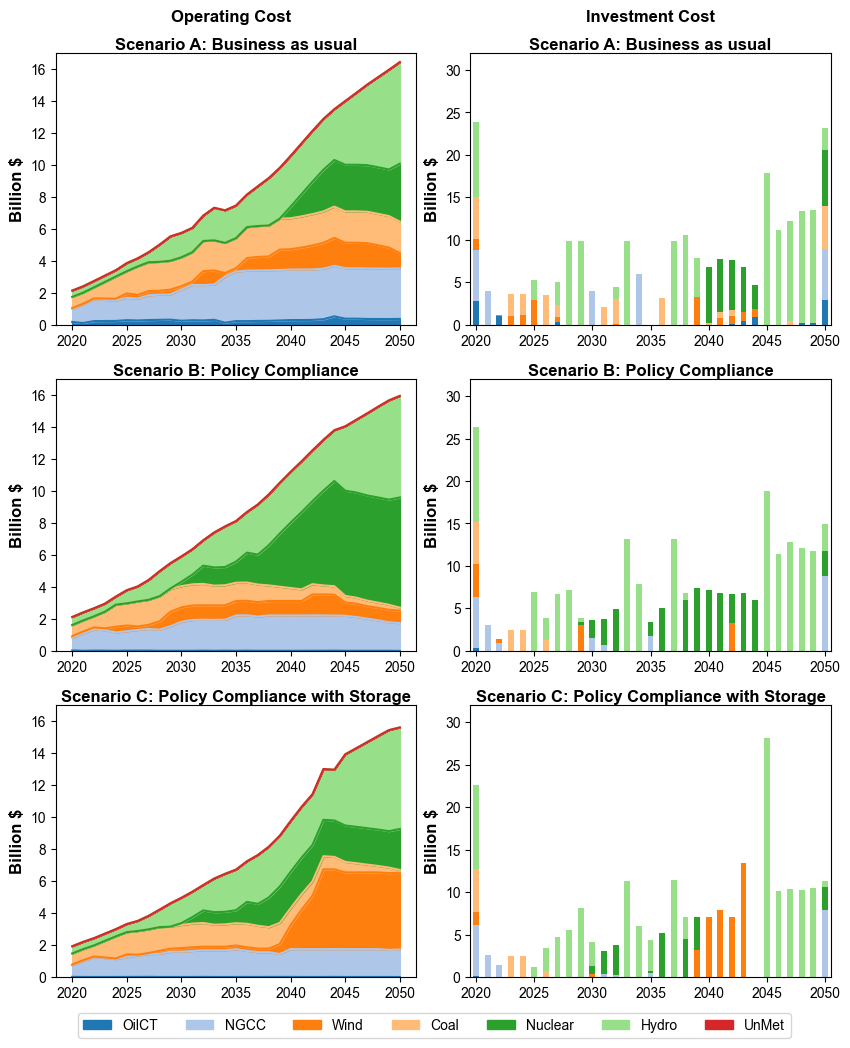

In [100]:
plt.rcParams.update({'font.family': 'Arial'})
fig = plt.figure(figsize=(10,12))  # You can adjust the size to fit your requirements
gs = gridspec.GridSpec(3, 2, width_ratios=[1, 1], wspace=0.15)
axes = [plt.subplot(gs[i, j]) for i in range(3) for j in range(2)]

# Add the column titles above the plot
fig.text(0.3, 0.91, 'Operating Cost',           verticalalignment='center', fontsize=12, horizontalalignment='center',fontweight='bold')
fig.text(0.72, 0.91, 'Investment Cost',          verticalalignment='center', fontsize=12, horizontalalignment='center',fontweight='bold')


# Add the row titles to the left side of the plot
axes[0].set_title('Scenario A: Business as usual', verticalalignment='center', fontsize=12,fontweight='bold')
axes[1].set_title('Scenario A: Business as usual', verticalalignment='center', fontsize=12,fontweight='bold')
axes[2].set_title('Scenario B: Policy Compliance', verticalalignment='center', fontsize=12,fontweight='bold')
axes[3].set_title('Scenario B: Policy Compliance', verticalalignment='center', fontsize=12,fontweight='bold')
axes[4].set_title('Scenario C: Policy Compliance with Storage', verticalalignment='center', fontsize=12,fontweight='bold')
axes[5].set_title('Scenario C: Policy Compliance with Storage', verticalalignment='center', fontsize=12,fontweight='bold')


get_energy_supply_cost_operating(Scenario_A_data).plot(kind='area',  legend=False, ax=axes[0])
get_energy_supply_cost_operating(Scenario_B_data).plot(kind='area',  legend=False, ax=axes[2])
get_energy_supply_cost_operating(Scenario_C_data).plot(kind='area',  legend=False, ax=axes[4])

get_energy_supply_cost_invest(Scenario_A_data).plot(kind='bar',  stacked = True,legend=False, ax=axes[1])
axes[1].set_xticks([0, 5, 10, 15, 20, 25, 30])
axes[1].set_xticklabels([2020, 2025, 2030, 2035, 2040, 2045, 2050], rotation=0)
get_energy_supply_cost_invest(Scenario_B_data).plot(kind='bar',  stacked = True,legend=False, ax=axes[3])
axes[3].set_xticks([0, 5, 10, 15, 20, 25, 30])
axes[3].set_xticklabels([2020, 2025, 2030, 2035, 2040, 2045, 2050], rotation=0)
get_energy_supply_cost_invest(Scenario_C_data).plot(kind='bar',  stacked = True,legend=False, ax=axes[5])
axes[5].set_xticks([0, 5, 10, 15, 20, 25, 30])
axes[5].set_xticklabels([2020, 2025, 2030, 2035, 2040, 2045, 2050], rotation=0)

max_y_cost_operating = 17
max_y_cost_invest = 32
axes[0].set_ylim([0, max_y_cost_operating])
axes[2].set_ylim([0, max_y_cost_operating])
axes[4].set_ylim([0, max_y_cost_operating])
axes[1].set_ylim([0, max_y_cost_invest])
axes[3].set_ylim([0, max_y_cost_invest])
axes[5].set_ylim([0, max_y_cost_invest])

# add unit to y-axis
axes[0].set_ylabel('Billion $', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Billion $', fontsize=12, fontweight='bold')
axes[2].set_ylabel('Billion $', fontsize=12, fontweight='bold')
axes[3].set_ylabel('Billion $', fontsize=12, fontweight='bold')
axes[4].set_ylabel('Billion $', fontsize=12, fontweight='bold')
axes[5].set_ylabel('Billion $', fontsize=12, fontweight='bold')

# Add legend
axes[4].legend(loc='lower center', bbox_to_anchor=(1.05, -0.25), ncol=7)

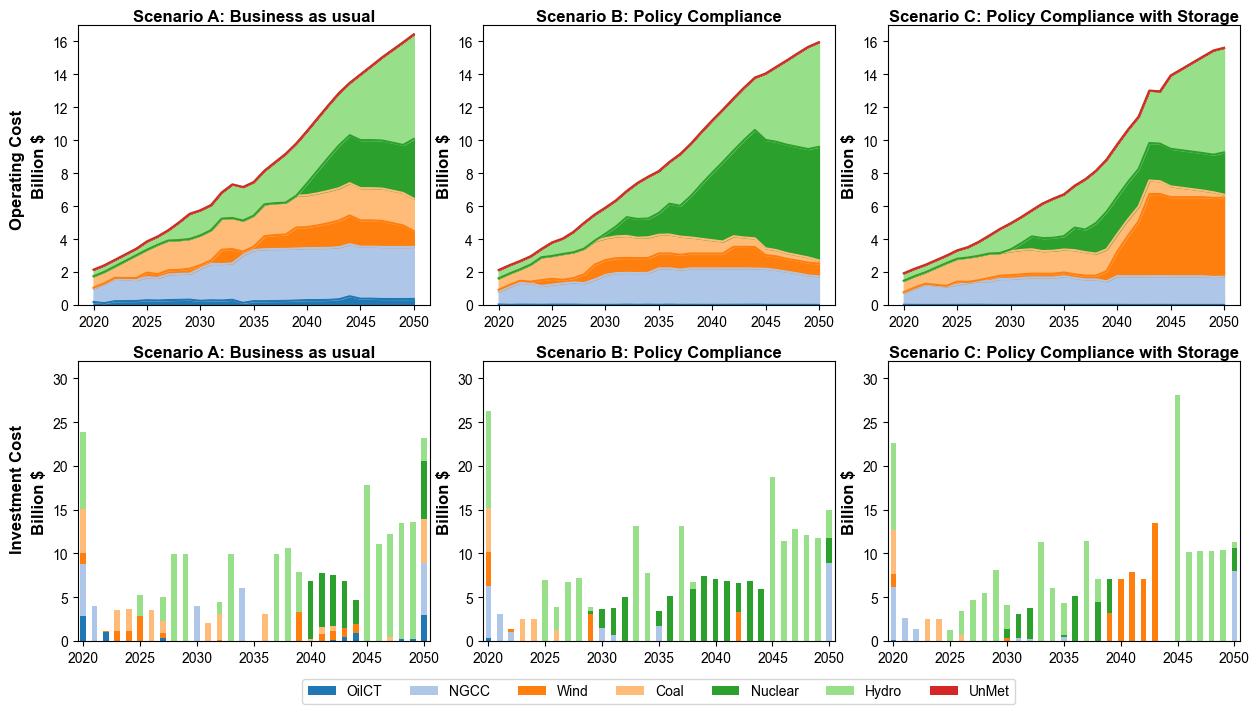

In [124]:
plt.rcParams.update({'font.family': 'Arial'})
fig = plt.figure(figsize=(15,8))  # You can adjust the size to fit your requirements
gs = gridspec.GridSpec(2, 3, width_ratios=[1, 1, 1], wspace=0.15)
axes = [plt.subplot(gs[i, j]) for i in range(2) for j in range(3)]

# Add the column titles above the plot
fig.text(0.085, 0.7, 'Operating Cost',     rotation='vertical',      verticalalignment='center', fontsize=12, horizontalalignment='center',fontweight='bold')
fig.text(0.085, 0.3, 'Investment Cost',   rotation='vertical',       verticalalignment='center', fontsize=12, horizontalalignment='center',fontweight='bold')


# Add the row titles to the left side of the plot
axes[0].set_title('Scenario A: Business as usual', verticalalignment='center', fontsize=12,fontweight='bold')
axes[3].set_title('Scenario A: Business as usual', verticalalignment='center', fontsize=12,fontweight='bold')
axes[1].set_title('Scenario B: Policy Compliance', verticalalignment='center', fontsize=12,fontweight='bold')
axes[4].set_title('Scenario B: Policy Compliance', verticalalignment='center', fontsize=12,fontweight='bold')
axes[2].set_title('Scenario C: Policy Compliance with Storage', verticalalignment='center', fontsize=12,fontweight='bold')
axes[5].set_title('Scenario C: Policy Compliance with Storage', verticalalignment='center', fontsize=12,fontweight='bold')


get_energy_supply_cost_operating(Scenario_A_data).plot(kind='area',  legend=False, ax=axes[0])
get_energy_supply_cost_operating(Scenario_B_data).plot(kind='area',  legend=False, ax=axes[1])
get_energy_supply_cost_operating(Scenario_C_data).plot(kind='area',  legend=False, ax=axes[2])

get_energy_supply_cost_invest(Scenario_A_data).plot(kind='bar',  stacked = True,legend=False, ax=axes[3])
axes[3].set_xticks([0, 5, 10, 15, 20, 25, 30])
axes[3].set_xticklabels([2020, 2025, 2030, 2035, 2040, 2045, 2050], rotation=0)
get_energy_supply_cost_invest(Scenario_B_data).plot(kind='bar',  stacked = True,legend=False, ax=axes[4])
axes[4].set_xticks([0, 5, 10, 15, 20, 25, 30])
axes[4].set_xticklabels([2020, 2025, 2030, 2035, 2040, 2045, 2050], rotation=0)
get_energy_supply_cost_invest(Scenario_C_data).plot(kind='bar',  stacked = True,legend=False, ax=axes[5])
axes[5].set_xticks([0, 5, 10, 15, 20, 25, 30])
axes[5].set_xticklabels([2020, 2025, 2030, 2035, 2040, 2045, 2050], rotation=0)

max_y_cost_operating = 17
max_y_cost_invest = 32
axes[0].set_ylim([0, max_y_cost_operating])
axes[1].set_ylim([0, max_y_cost_operating])
axes[2].set_ylim([0, max_y_cost_operating])
axes[3].set_ylim([0, max_y_cost_invest])
axes[4].set_ylim([0, max_y_cost_invest])
axes[5].set_ylim([0, max_y_cost_invest])

# add unit to y-axis
axes[0].set_ylabel('Billion $', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Billion $', fontsize=12, fontweight='bold')
axes[2].set_ylabel('Billion $', fontsize=12, fontweight='bold')
axes[3].set_ylabel('Billion $', fontsize=12, fontweight='bold')
axes[4].set_ylabel('Billion $', fontsize=12, fontweight='bold')
axes[5].set_ylabel('Billion $', fontsize=12, fontweight='bold')

# Add legend
axes[4].legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=len(axes[1].lines))

# Enenrgy Demand Transformation
## Capcity Change

In [101]:
def get_energy_demand_capacity(BAU_data):
    total_annual_capacity = BAU_data.loc['TotalAnnualCapacity']
    energy_demand_capacity = total_annual_capacity.iloc[13:21,1:32]
    year_list = list(range(2020, 2051))
    energy_demand_capacity.columns = year_list
    energy_demand_list = ['Refrigerator','Lamp', 'others', 'cooking', 'Refrigerator_N','Lamp_N', 'Others_N', 'Cooking_N']
    energy_demand_capacity.index = energy_demand_list
    energy_demand_capacity = energy_demand_capacity.apply(pd.to_numeric, errors='coerce')
    energy_demand_capacity = energy_demand_capacity.T
    return energy_demand_capacity

<Axes: >

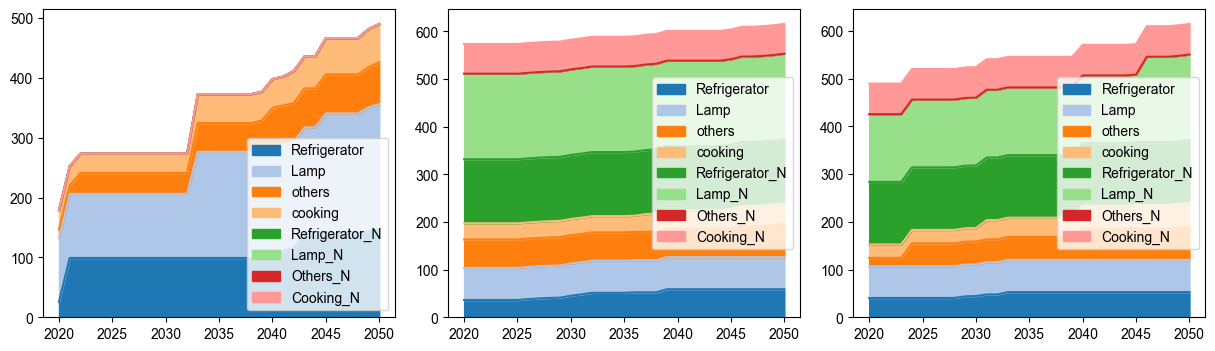

In [102]:
fig = plt.figure(figsize=(15,4))  # You can adjust the size to fit your requirements
gs = gridspec.GridSpec(1, 3, width_ratios=[1, 1, 1], wspace=0.15)
axes = [plt.subplot(gs[i, j]) for i in range(1) for j in range(3)]

get_energy_demand_capacity(Scenario_A_data).plot(kind='area', ax=axes[0])
get_energy_demand_capacity(Scenario_B_data).plot(kind='area', ax=axes[1])
get_energy_demand_capacity(Scenario_C_data).plot(kind='area', ax=axes[2])

## Cost Change

In [103]:
def get_energy_demand_cost(BAU_data):
    total_annual_cost = BAU_data.loc['AnnualVariableOperatingCost']
    energy_demand_cost = total_annual_cost.iloc[17:21,1:32]
    year_list = list(range(2020, 2051))
    energy_demand_cost.columns = year_list
    energy_demand_list = ['Refrigerator_N','Lamp_N', 'Others_N', 'Cooking_N']
    energy_demand_cost.index = energy_demand_list
    energy_demand_cost = energy_demand_cost.apply(pd.to_numeric, errors='coerce')/1000
    energy_demand_cost = energy_demand_cost.T
    return energy_demand_cost

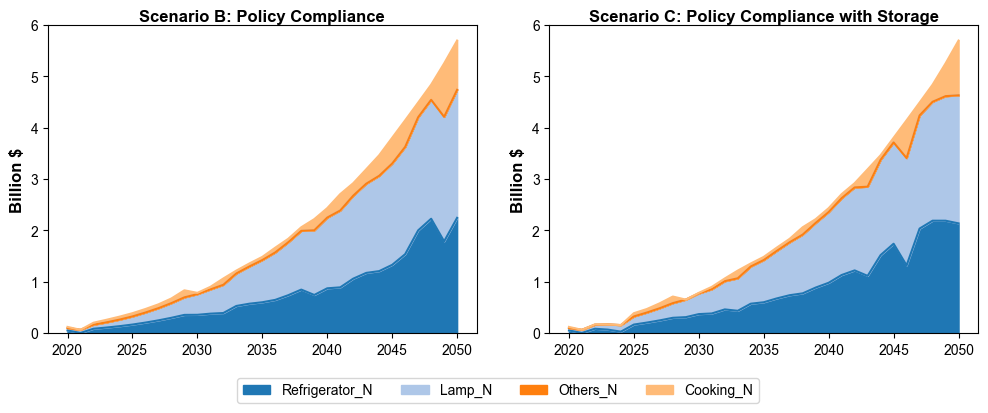

In [127]:
plt.rcParams.update({'font.family': 'Arial'})
fig = plt.figure(figsize=(12,4))  # You can adjust the size to fit your requirements
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1], wspace=0.17)
axes = [plt.subplot(gs[i, j]) for i in range(1) for j in range(2)]

axes[0].set_title('Scenario B: Policy Compliance', verticalalignment='center', fontsize=12,fontweight='bold')
axes[1].set_title('Scenario C: Policy Compliance with Storage', verticalalignment='center', fontsize=12,fontweight='bold')

get_energy_demand_cost(Scenario_B_data).plot(kind='area', ax=axes[0], legend=False)
get_energy_demand_cost(Scenario_C_data).plot(kind='area', ax=axes[1], legend=False)

max_y = 6
axes[0].set_ylim([0, max_y])
axes[1].set_ylim([0, max_y])

# add unit to y-axis
axes[0].set_ylabel('Billion $', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Billion $', fontsize=12, fontweight='bold')

# Add legend
axes[1].legend(loc='lower center', bbox_to_anchor=(-0.12, -0.25), ncol=len(axes[1].lines))

## Activity Change

In [105]:
def get_energy_demand_activity(BAU_data):
    demand_annual_acivity = BAU_data.loc['UseByTechnologyByTimeSlice']
    energy_demand_acivity = demand_annual_acivity.iloc[56:120,0:35]
    # make the df group by the first column
    energy_demand_acivity = energy_demand_acivity.groupby(energy_demand_acivity.columns[0]).sum()
    # remove the first two columns
    energy_demand_acivity = energy_demand_acivity.iloc[:,2:]
    year_list = list(range(2020, 2051))
    energy_demand_acivity.columns = year_list
    energy_demand_list = ['Cooking','Cooking_N','Lamp','Lamp_N','Others','Others_N','Refrigerator','Refrigerator_N']
    energy_demand_acivity.index = energy_demand_list
    energy_demand_acivity = energy_demand_acivity.apply(pd.to_numeric, errors='coerce')
    energy_demand_acivity = energy_demand_acivity.T
    return energy_demand_acivity

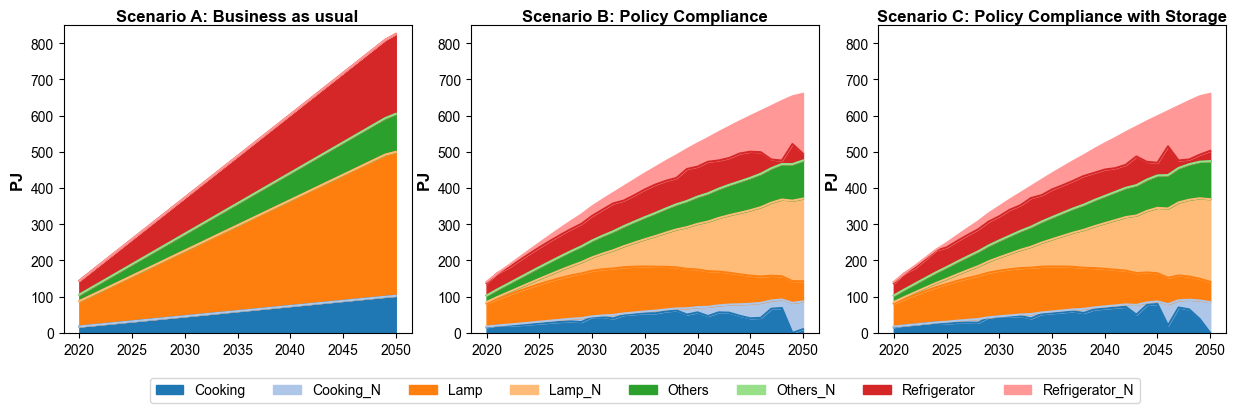

In [106]:
sns.set_palette(specical_color)
plt.rcParams.update({'font.family': 'Arial'})
fig = plt.figure(figsize=(15,4))  # You can adjust the size to fit your requirements
gs = gridspec.GridSpec(1, 3, width_ratios=[1, 1, 1], wspace=0.17)
axes = [plt.subplot(gs[i, j]) for i in range(1) for j in range(3)]

# Add the row titles to the left side of the plot
axes[0].set_title('Scenario A: Business as usual', verticalalignment='center', fontsize=12,fontweight='bold')
axes[1].set_title('Scenario B: Policy Compliance', verticalalignment='center', fontsize=12,fontweight='bold')
axes[2].set_title('Scenario C: Policy Compliance with Storage', verticalalignment='center', fontsize=12,fontweight='bold')


get_energy_demand_activity(Scenario_A_data).plot(kind='area', ax=axes[0], legend=False)
get_energy_demand_activity(Scenario_B_data).plot(kind='area', ax=axes[1], legend=False)
get_energy_demand_activity(Scenario_C_data).plot(kind='area', ax=axes[2], legend=False)

max_y = 850
axes[0].set_ylim([0, max_y])
axes[1].set_ylim([0, max_y])
axes[2].set_ylim([0, max_y])

# add unit to y-axis
axes[0].set_ylabel('PJ', fontsize=12, fontweight='bold')
axes[1].set_ylabel('PJ', fontsize=12, fontweight='bold')
axes[2].set_ylabel('PJ', fontsize=12, fontweight='bold')

# Add legend
axes[1].legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=len(axes[1].lines))

# Emission Constrains

In [107]:
def get_emission_data(BAU_data):
    emission_annual = BAU_data.loc['AnnualEmissions']
    # get the second column and make it as a list
    emission_annual.index=emission_annual.iloc[:,0].tolist()
    emission_annual = emission_annual.iloc[:,1:32]
    emission_annual.columns = list(range(2020, 2051))
    emission_annual = emission_annual.apply(pd.to_numeric, errors='coerce')
    emission_annual_co2 = emission_annual.loc['CO2']
    emission_annual_nox = emission_annual.loc['NOX']
    return emission_annual_co2, emission_annual_nox

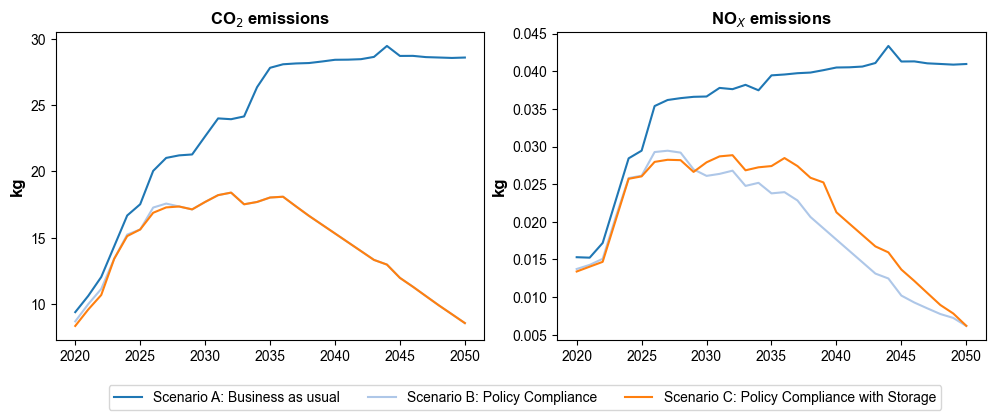

In [108]:
plt.rcParams.update({'font.family': 'Arial'})
Scenario_A_co2, Scenario_A_nox = get_emission_data(Scenario_A_data)
Scenario_B_co2, Scenario_B_nox = get_emission_data(Scenario_B_data)
Scenario_C_co2, Scenario_C_nox = get_emission_data(Scenario_C_data)


fig = plt.figure(figsize=(12,4)) 
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1], wspace=0.17)
# Create subplots
axes = [plt.subplot(gs[i, j]) for i in range(1) for j in range(2)]

# Plot BAU_co2 in the first subplot
axes[0].plot(Scenario_A_co2)
axes[0].plot(Scenario_B_co2)
axes[0].plot(Scenario_C_co2)
axes[0].set_title('CO$_2$ emissions', fontsize=12,fontweight='bold')

# Plot BAU_nox in the second subplot
axes[1].plot(Scenario_A_nox)
axes[1].plot(Scenario_B_nox)
axes[1].plot(Scenario_C_nox)
axes[1].set_title('NO$_X$ emissions', fontsize=12,fontweight='bold')

# add unit to y-axis
axes[0].set_ylabel('kg', fontsize=12, fontweight='bold')
axes[1].set_ylabel('kg', fontsize=12, fontweight='bold')

# Add legend
axes[1].legend(['Scenario A: Business as usual', 'Scenario B: Policy Compliance', 'Scenario C: Policy Compliance with Storage'], 
               loc='lower center', bbox_to_anchor=(-0.075, -0.25), ncol=3)
# Show the plot
plt.show()